In [44]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import mixture
from sklearn import preprocessing
from sklearn.decomposition import PCA
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [45]:
df = pd.read_csv('../raw_data/teste_argo_data.csv')

In [46]:
pres = df.columns[2:].values

In [47]:
lon = df.iloc[:,0].values
lat = df.iloc[:,1].values

In [48]:
X = df.iloc[:,2:].values

In [49]:
Xscaled = preprocessing.scale(X)

In [50]:
pca = PCA()

In [51]:
pca.fit(Xscaled)

PCA()

In [52]:
Xpca = pca.transform(Xscaled)

In [53]:
pca.components_.shape

(194, 194)

In [54]:
X_proj = pd.DataFrame(Xpca, columns=[f'PC{i}' for i in range(1, pca.components_.shape[0]+1)])
X_proj

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC185,PC186,PC187,PC188,PC189,PC190,PC191,PC192,PC193,PC194
0,-13.800140,-0.088536,-0.802386,0.146713,-0.121145,-0.116634,0.036406,-0.033581,-0.063240,0.021586,...,-0.000048,0.000091,0.000172,-0.000320,-0.000012,0.000070,-0.000030,-0.000207,0.000025,-0.000026
1,12.315478,5.053959,2.486225,0.852012,0.977510,0.109802,0.084285,0.014537,0.014616,0.003140,...,-0.000680,-0.000472,0.000612,0.001808,-0.000810,-0.001604,-0.000195,-0.000178,0.000452,-0.000614
2,-18.002848,0.842774,-0.052298,0.273874,-0.239898,-0.084295,0.210182,-0.062875,0.097927,0.011267,...,0.000325,-0.000903,0.000730,-0.000156,0.000141,-0.000815,0.000077,-0.000989,0.000263,-0.000790
3,9.232282,3.941341,2.121293,0.209725,0.654320,0.059740,-0.094940,-0.001666,-0.022294,-0.102056,...,-0.000129,-0.000358,-0.000015,0.000598,-0.000191,-0.000709,-0.000221,-0.000089,-0.000050,-0.000163
4,-15.660547,0.354678,-1.469497,0.746474,-0.165224,-0.565085,0.260264,-0.024580,-0.032046,0.084464,...,-0.000082,-0.000300,0.000158,-0.000007,0.000068,-0.000109,0.000331,0.000041,0.000245,-0.000042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,5.951216,-8.099486,1.520550,-2.027146,-1.026822,0.450111,0.672357,0.304562,0.110947,-0.140166,...,-0.000008,0.000683,-0.000490,0.000389,-0.001367,-0.000095,0.000465,-0.000451,0.000506,0.000312
2841,6.007221,-9.050296,0.300645,-0.634731,-1.488348,0.699429,1.049598,-0.016103,0.399259,-0.150541,...,0.000059,0.000504,-0.000559,-0.000616,-0.001104,-0.000446,0.000428,-0.000261,0.000669,0.000342
2842,-19.414146,0.376482,1.058597,-0.698458,0.616486,-0.135374,-0.070796,0.251857,-0.067231,0.104113,...,-0.000253,-0.000116,0.001187,0.000383,-0.000252,0.000534,-0.000854,-0.000471,0.000042,-0.001232
2843,-19.574875,0.335495,1.289835,-0.724122,0.713833,0.036828,-0.269456,0.321953,-0.153918,0.107211,...,0.000281,0.000578,-0.000023,0.000354,-0.000093,-0.000273,-0.000462,0.000192,-0.000247,0.000110


<AxesSubplot:>

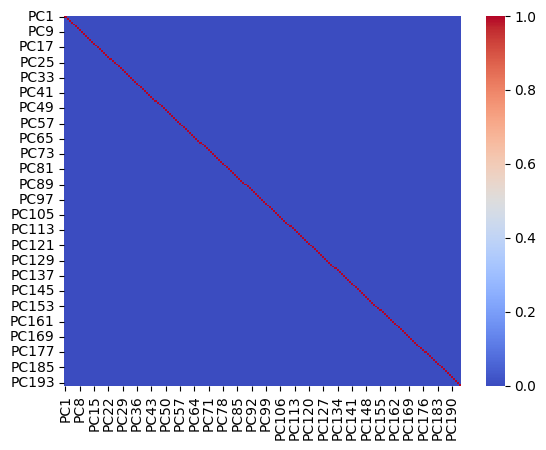

In [55]:
sns.heatmap(X_proj.corr(), cmap='coolwarm')

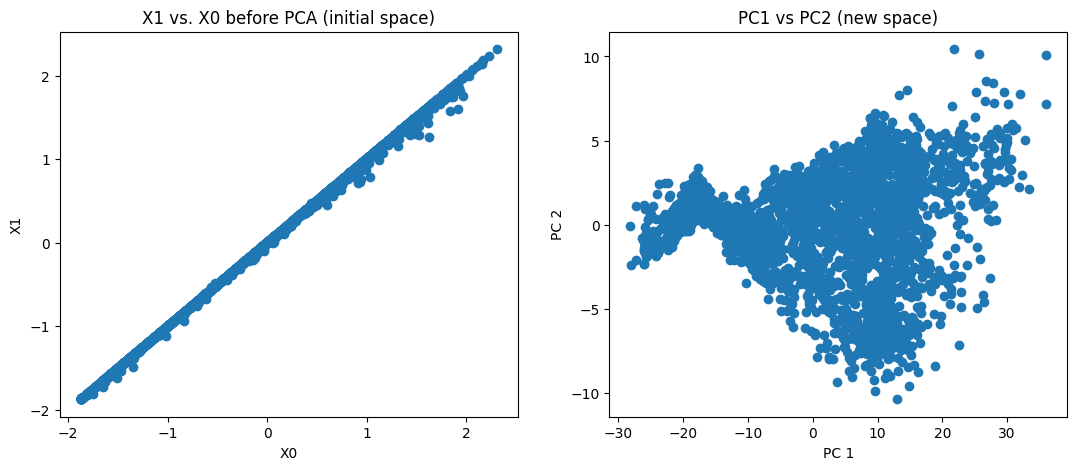

In [56]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('X1 vs. X0 before PCA (initial space)'); plt.xlabel('X0'); plt.ylabel('X1')
plt.scatter(Xscaled[:,0], Xscaled[:,1])

plt.subplot(1,2,2)
plt.title('PC1 vs PC2 (new space)'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1]);

In [57]:
# Computational proof
W = pca.components_.T
print("Shape of W: ", W.shape)
print("Shape of X", Xscaled.shape)

Shape of W:  (194, 194)
Shape of X (2845, 194)


In [58]:
np.allclose(
    pca.transform(X),
    np.dot(X,W)
)

True

In [59]:
pca.explained_variance_ratio_.cumsum()

array([0.93309462, 0.98117968, 0.99341957, 0.99660512, 0.9981333 ,
       0.99887451, 0.9992017 , 0.99939186, 0.99951738, 0.99960577,
       0.99967456, 0.99972232, 0.99976212, 0.99979309, 0.99982039,
       0.99984231, 0.99986039, 0.99987606, 0.99988909, 0.99990066,
       0.99991095, 0.99991955, 0.99992689, 0.99993376, 0.99993974,
       0.99994542, 0.99995053, 0.99995486, 0.9999588 , 0.99996203,
       0.99996505, 0.99996767, 0.99996976, 0.99997172, 0.99997355,
       0.99997514, 0.99997672, 0.99997819, 0.99997948, 0.99998067,
       0.9999817 , 0.99998269, 0.99998366, 0.99998455, 0.99998536,
       0.9999861 , 0.99998684, 0.99998753, 0.99998813, 0.99998869,
       0.9999892 , 0.99998971, 0.99999017, 0.9999906 , 0.999991  ,
       0.99999137, 0.99999173, 0.99999208, 0.99999241, 0.99999273,
       0.99999303, 0.99999331, 0.99999358, 0.99999384, 0.99999408,
       0.99999432, 0.99999455, 0.99999477, 0.99999497, 0.99999516,
       0.99999535, 0.99999552, 0.9999957 , 0.99999586, 0.99999

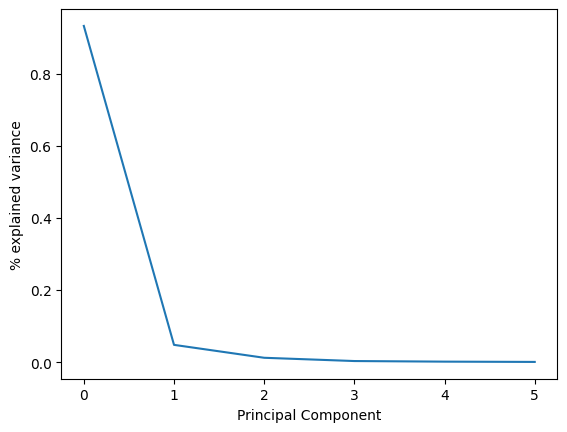

In [60]:
plt.plot(pca.explained_variance_ratio_[0:6])
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');

In [61]:
pca = PCA(n_components=6)
pca.fit(Xscaled)
Xpca = pca.transform(Xscaled)

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)

In [21]:
# Instantiate model
model = mixture.GaussianMixture()

param_grid = {
    "n_components": range(2, 12),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    model, param_grid=param_grid, scoring=gmm_bic_score, verbose=3
)
grid_search.fit(Xpca)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END covariance_type=spherical, n_components=2;, score=-20161.888 total time=   0.1s
[CV 2/5] END covariance_type=spherical, n_components=2;, score=-19284.500 total time=   0.1s
[CV 3/5] END covariance_type=spherical, n_components=2;, score=-17815.722 total time=   0.2s
[CV 4/5] END covariance_type=spherical, n_components=2;, score=-17799.832 total time=   0.1s
[CV 5/5] END covariance_type=spherical, n_components=2;, score=-18430.869 total time=   0.2s
[CV 1/5] END covariance_type=spherical, n_components=3;, score=-19143.613 total time=   0.1s
[CV 2/5] END covariance_type=spherical, n_components=3;, score=-16789.628 total time=   0.1s
[CV 3/5] END covariance_type=spherical, n_components=3;, score=-16623.022 total time=   0.1s
[CV 4/5] END covariance_type=spherical, n_components=3;, score=-16847.700 total time=   0.1s
[CV 5/5] END covariance_type=spherical, n_components=3;, score=-17486.872 total time=   0.1s
[CV 1/5]

[CV 2/5] END covariance_type=tied, n_components=10;, score=-12578.826 total time=   0.2s
[CV 3/5] END covariance_type=tied, n_components=10;, score=-11452.254 total time=   0.2s
[CV 4/5] END covariance_type=tied, n_components=10;, score=-11498.988 total time=   0.2s
[CV 5/5] END covariance_type=tied, n_components=10;, score=-11480.125 total time=   0.2s
[CV 1/5] END covariance_type=tied, n_components=11;, score=-13402.544 total time=   0.2s
[CV 2/5] END covariance_type=tied, n_components=11;, score=-12641.566 total time=   0.2s
[CV 3/5] END covariance_type=tied, n_components=11;, score=-11638.092 total time=   0.2s
[CV 4/5] END covariance_type=tied, n_components=11;, score=-11551.053 total time=   0.2s
[CV 5/5] END covariance_type=tied, n_components=11;, score=-11438.021 total time=   0.2s
[CV 1/5] END covariance_type=diag, n_components=2;, score=-12684.834 total time=   0.1s
[CV 2/5] END covariance_type=diag, n_components=2;, score=-12538.579 total time=   0.1s
[CV 3/5] END covariance

[CV 1/5] END covariance_type=full, n_components=9;, score=-12341.407 total time=   0.3s
[CV 2/5] END covariance_type=full, n_components=9;, score=-11931.184 total time=   0.2s
[CV 3/5] END covariance_type=full, n_components=9;, score=-11265.264 total time=   0.2s
[CV 4/5] END covariance_type=full, n_components=9;, score=-11143.221 total time=   0.2s
[CV 5/5] END covariance_type=full, n_components=9;, score=-10877.254 total time=   0.2s
[CV 1/5] END covariance_type=full, n_components=10;, score=-12449.799 total time=   0.2s
[CV 2/5] END covariance_type=full, n_components=10;, score=-12183.609 total time=   0.4s
[CV 3/5] END covariance_type=full, n_components=10;, score=-11364.436 total time=   0.3s
[CV 4/5] END covariance_type=full, n_components=10;, score=-11226.740 total time=   0.2s
[CV 5/5] END covariance_type=full, n_components=10;, score=-11007.650 total time=   0.2s
[CV 1/5] END covariance_type=full, n_components=11;, score=-12794.804 total time=   0.3s
[CV 2/5] END covariance_ty

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(2, 12)},
             scoring=<function gmm_bic_score at 0x7f56e16b2440>, verbose=3)

In [64]:
comp_df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
comp_df["mean_test_score"] = -comp_df["mean_test_score"]
comp_df = comp_df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
comp_df.sort_values(by="BIC score").head()

,Number of components,Type of covariance,BIC score
33,5,full,11441.224571
34,6,full,11456.790169
36,8,full,11492.349248
35,7,full,11497.325348
37,9,full,11511.665954


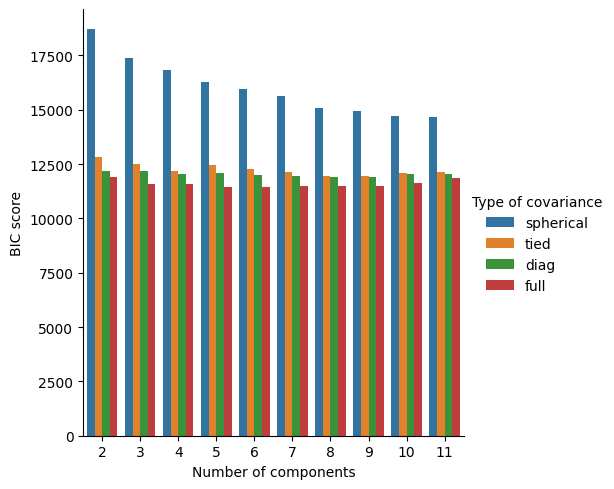

In [65]:
sns.catplot(
    data=comp_df,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()

In [66]:
labels = grid_search.predict(Xpca)

In [67]:
# find posterior probabilities (the probabilities of belonging to each class)
posterior_probs = grid_search.predict_proba(Xpca)
posterior_probs

array([[1.16074809e-017, 1.44604340e-002, 9.99866673e-004,
        9.84539699e-001, 5.47706930e-020],
       [9.72074323e-001, 0.00000000e+000, 2.79256772e-002,
        1.94264593e-013, 2.44735685e-126],
       [2.55517546e-020, 9.96009262e-001, 2.31978413e-005,
        3.96754025e-003, 1.85000071e-025],
       ...,
       [1.48947615e-019, 9.99976269e-001, 1.83311513e-005,
        5.39996163e-006, 7.45402230e-024],
       [3.61436894e-019, 9.99984937e-001, 1.49121186e-005,
        1.50582883e-007, 1.34154587e-022],
       [2.03397388e-020, 9.99732179e-001, 4.02426995e-005,
        2.27577871e-004, 4.59985146e-022]])

In [68]:
# maximum posterior probability (the class is assigned based on this value)
max_posterior_probs = np.max(posterior_probs,axis=1) 
max_posterior_probs

array([0.9845397 , 0.97207432, 0.99600926, ..., 0.99997627, 0.99998494,
       0.99973218])

In [69]:
df.shape

(2845, 196)

In [70]:
# put the labels and maximum posterior probabilities back in original dataframe
df.insert(2,'label',labels,True)
df.insert(3,'max posterior prob',max_posterior_probs,True) 
df

,x,y,label,max posterior prob,15.0,20.0,25.0,30.0,35.0,40.0,...,935.0,940.0,945.0,950.0,955.0,960.0,965.0,970.0,975.0,980.0
0,51.582001,-45.755001,3,0.984540,5.681237,5.683842,5.603836,5.518481,5.438179,5.358996,...,2.495287,2.492187,2.491260,2.490473,2.489686,2.488898,2.488111,2.487324,2.486536,2.485749
1,92.547997,-43.222000,0,0.972074,10.326000,10.326000,10.326000,10.326098,10.328574,10.331011,...,5.563226,5.486413,5.446694,5.406974,5.367255,5.327535,5.287816,5.248096,5.208376,5.168657
2,89.600998,-56.223000,1,0.996009,2.383455,2.381051,2.383966,2.386997,2.388578,2.390099,...,1.955992,1.952437,1.946748,1.941059,1.935370,1.929681,1.923992,1.918303,1.912614,1.906924
3,115.977997,-45.905998,0,0.985542,9.729325,9.714897,9.688203,9.658428,9.637267,9.616872,...,5.321880,5.270394,5.228471,5.188967,5.149464,5.109960,5.070456,5.030951,4.991447,4.951944
4,64.942001,-50.344002,1,0.850861,5.158442,5.158958,5.159000,5.159000,5.159450,5.159940,...,2.364662,2.364060,2.362651,2.361151,2.359651,2.358151,2.356651,2.355152,2.353652,2.352152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,-39.964000,-38.967000,2,1.000000,16.596121,16.565039,16.456429,16.412775,16.380226,16.339870,...,3.860535,3.858713,3.856145,3.841860,3.827575,3.813290,3.799005,3.784720,3.770435,3.756150
2841,-42.367000,-39.641000,2,1.000000,20.193810,20.202423,20.205034,20.205944,20.205999,20.206173,...,3.731355,3.711967,3.692580,3.678507,3.664907,3.651306,3.637705,3.624104,3.610504,3.596903
2842,138.729000,-63.489000,1,0.999976,-0.475158,-0.500516,-0.517110,-0.522902,-0.534635,-0.534569,...,1.545980,1.543271,1.540698,1.537072,1.534201,1.532202,1.528509,1.522929,1.517234,1.510901
2843,82.050000,-61.522000,1,0.999985,-0.202319,-0.380112,-0.466284,-0.479081,-0.492424,-0.513382,...,1.474192,1.470694,1.465577,1.462389,1.458191,1.451691,1.448193,1.443691,1.439381,1.435694


In [71]:
# group profiles according to label
grouped_unsorted = df.groupby('label')

In [72]:
# calculate mean of all profiles in each class
df_means = grouped_unsorted.mean()

In [73]:
n_comp = grid_search.best_estimator_.n_components

In [74]:
# extrat sea surface temperatures (SSTs)
T15_means = df_means['15.0'].values

# sort mean temperatuer at 15 dbar from coldest to warmest
old2new = np.argsort(T15_means)

# create dictionary object for sorting
di = dict(zip(old2new,range(0,n_comp)))

# add new column to dataframe - sorted label
df.insert(3,'label_sorted',df['label'].map(di))

In [75]:
# group profiles according to label
grouped = df.groupby('label_sorted')

# calculate mean of all profiles in each class
dfg_means = grouped.mean()

# calculate stdevs of all profiles in each class
dfg_stds = grouped.std()

# number or profiles in each class
nprofs = grouped['x'].count().values

In [76]:
print(dfg_means['15.0'])

label_sorted
0     1.358990
1     6.533048
2    14.429063
3    15.545148
4    15.863511
Name: 15.0, dtype: float64


In [79]:
p = np.asarray([float(i) for i in pres])

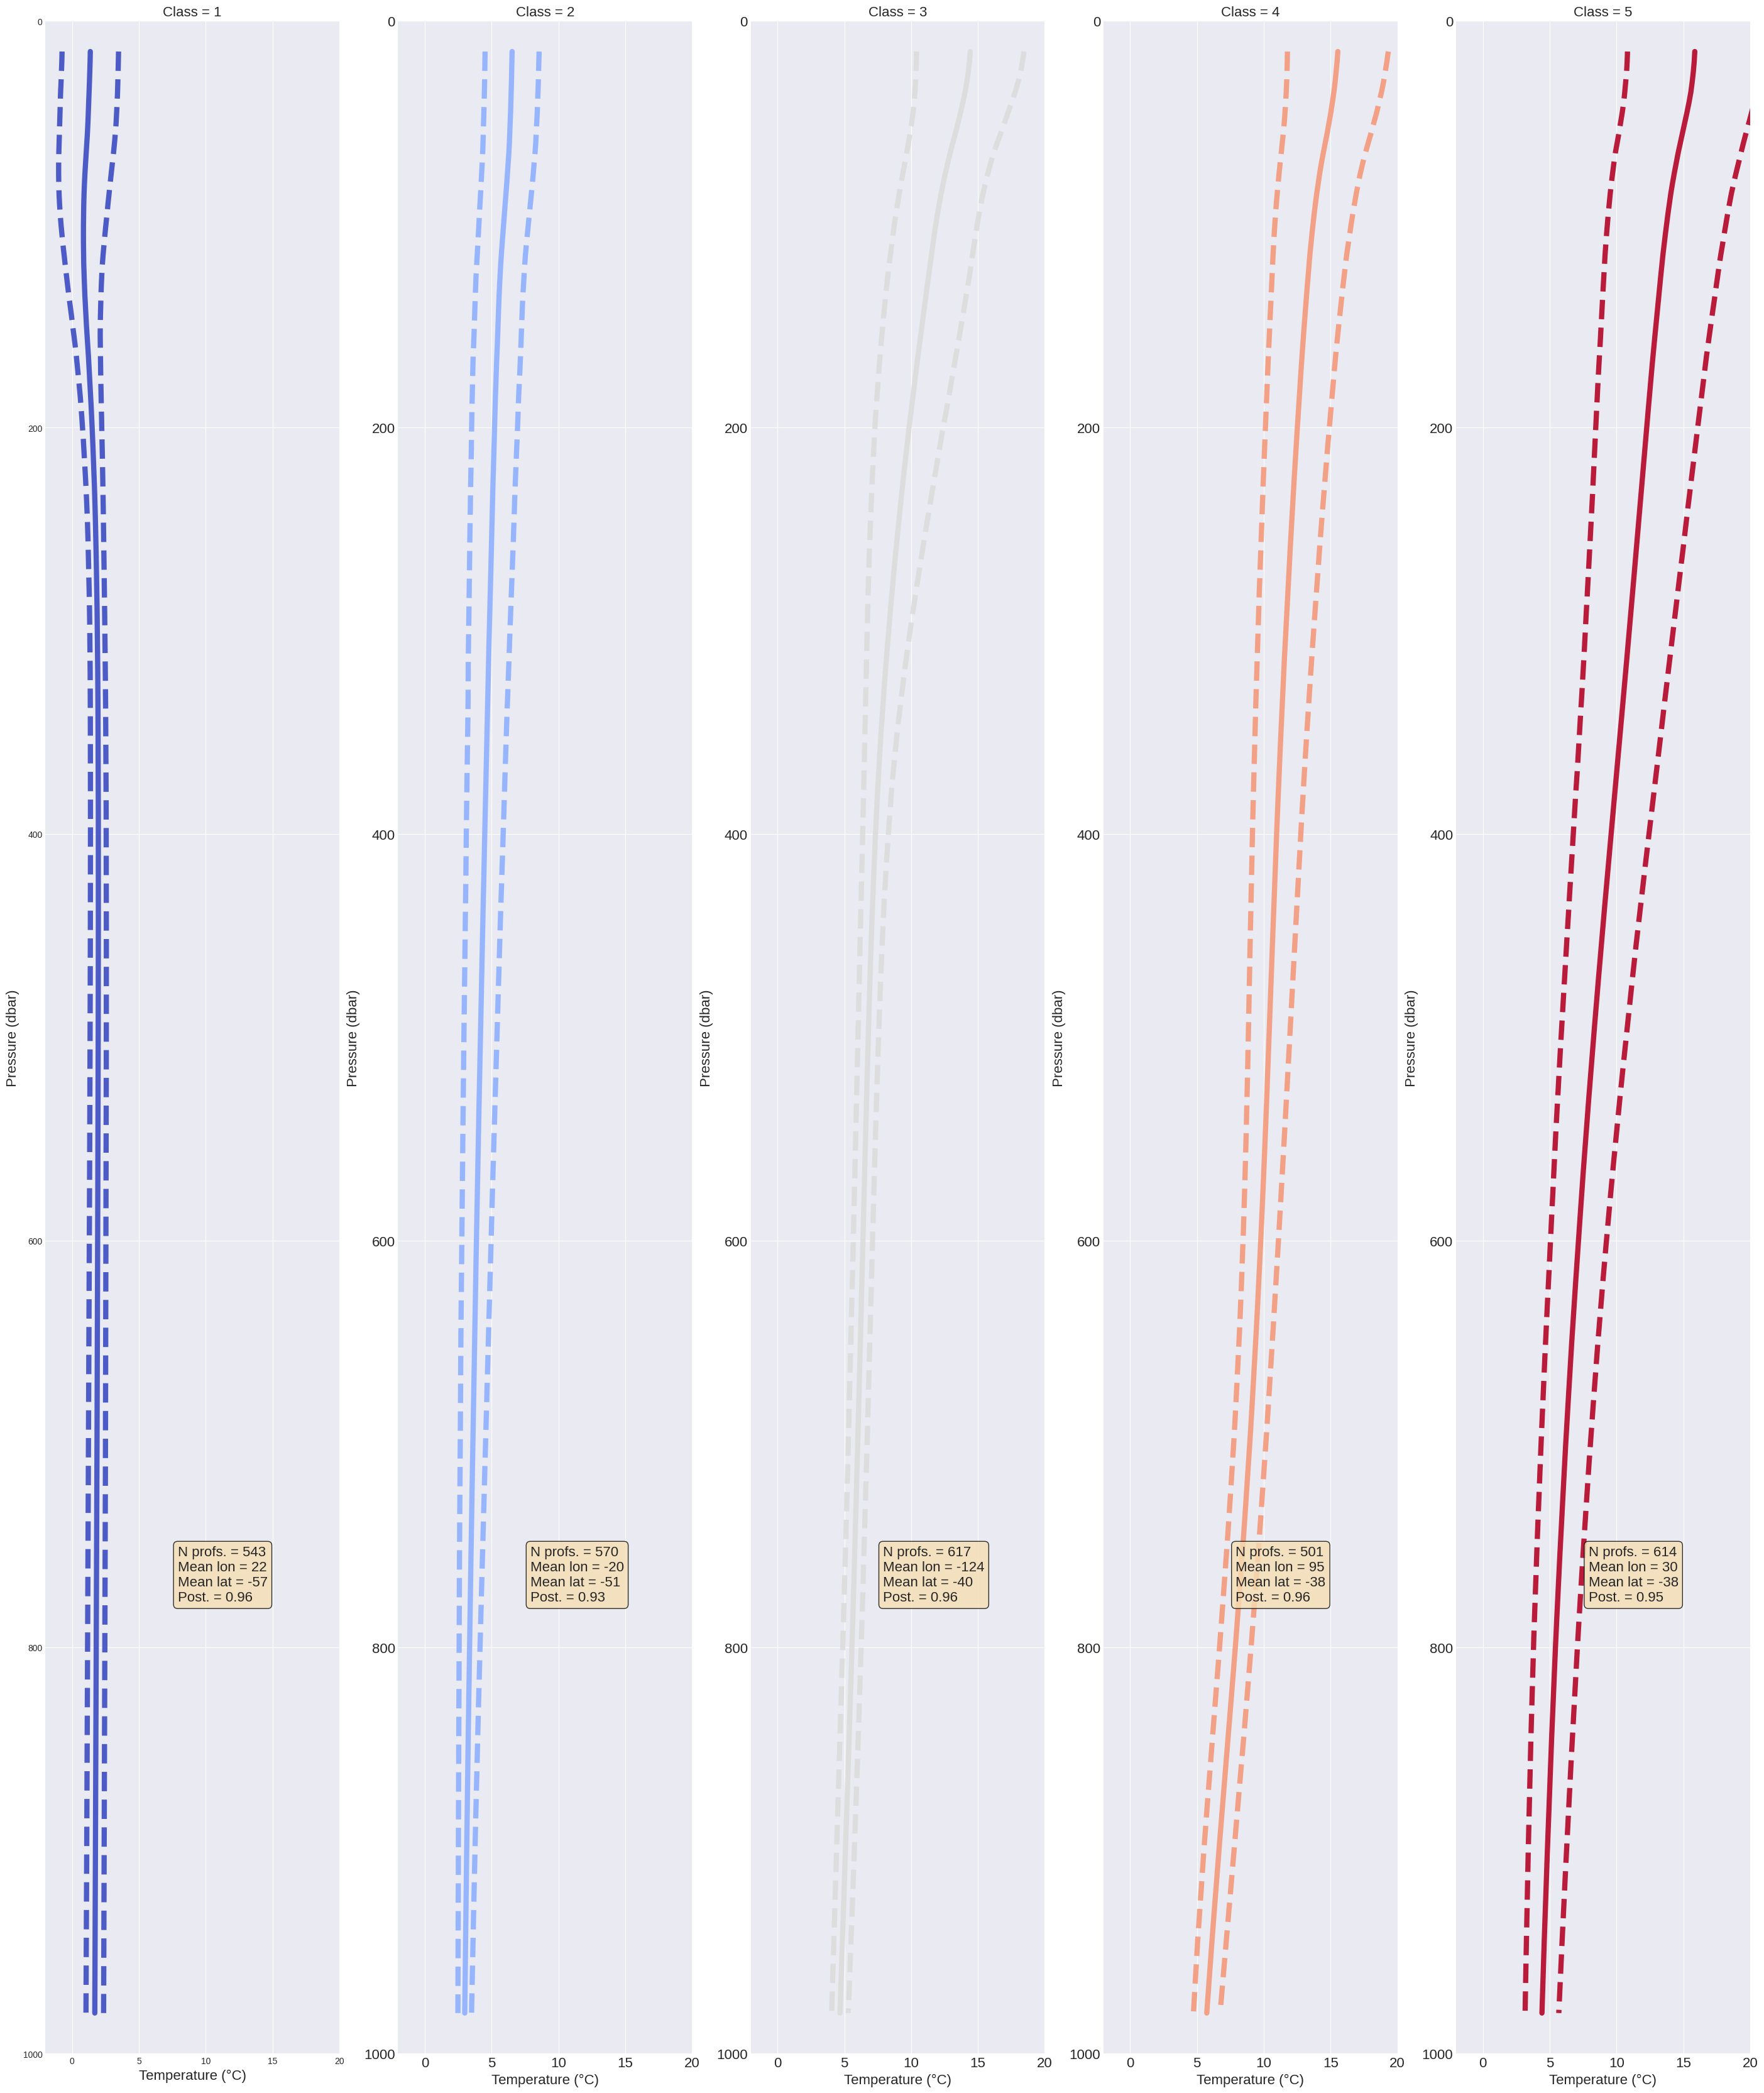

In [80]:
# initialize the figure
plt.figure(figsize=(35, 42))
plt.style.use('seaborn-darkgrid')

# create a color palette
palette = cm.coolwarm(np.linspace(0,1,n_comp))

# iterate over groups
num = 0
for nrow in range(0,n_comp):
    num += 1
    
    # extract means
    mean_lon = dfg_means.iloc[nrow,0]
    mean_lat = dfg_means.iloc[nrow,1]
    mean_maxpp = dfg_means.iloc[nrow,3]
    mean_T = dfg_means.iloc[nrow,4:].values
    
    # extract stdevs
    std_lon = dfg_stds.iloc[nrow,0]
    std_lat = dfg_stds.iloc[nrow,1]
    std_maxpp = dfg_stds.iloc[nrow,3]
    std_T = dfg_stds.iloc[nrow,4:].values
    
    # select subplot
    plt.subplot(int(np.ceil(n_comp/5)),5,num)
    plt.plot(mean_T, p, marker='', linestyle='solid', color=palette[nrow], linewidth=6.0, alpha=0.9)
    plt.plot(mean_T+std_T, p, marker='', linestyle='dashed', color=palette[nrow], linewidth=6.0, alpha=0.9)
    plt.plot(mean_T-std_T, p, marker='', linestyle='dashed', color=palette[nrow], linewidth=6.0, alpha=0.9)
    
    # custom grid and axes
    plt.ylim([0,1000])
    ax = plt.gca()
    ax.invert_yaxis() 
    plt.xlim([-2, 20])
    ax.grid(True)
    
    fs = 16 # font size
    plt.xlabel('Temperature (°C)', fontsize=fs)
    plt.ylabel('Pressure (dbar)', fontsize=fs)
    plt.title('Class = ' + str(num), fontsize=fs)
    mpl.rc('xtick', labelsize=fs)     
    mpl.rc('ytick', labelsize=fs)
    
    # text box
    textstr = '\n'.join((
        r'N profs. = %i' % (nprofs[nrow], ),
        r'Mean lon = %i' % (mean_lon, ),
        r'Mean lat = %i' % (mean_lat, ),
        r'Post. = %.2f' % (mean_maxpp, )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
    # place a text box in upper left in axes coords
    ax.text(0.45, 0.25, textstr, transform=ax.transAxes, fontsize=fs,
            verticalalignment='top', bbox=props)
    
plt.show()
    

In [109]:
df_1 = df[df.label_sorted == 2]

In [110]:
df_1.head()

,x,y,label,label_sorted,max posterior prob,15.0,20.0,25.0,30.0,35.0,...,935.0,940.0,945.0,950.0,955.0,960.0,965.0,970.0,975.0,980.0
182,-152.175003,-47.660000,4,2,0.986157,10.405910,10.388568,10.346299,10.173140,10.018605,...,5.738543,5.716289,5.691873,5.657477,5.623081,5.588686,5.554290,5.519895,5.485499,5.451104
183,-146.952000,-46.522000,4,2,0.992011,8.662434,8.666079,8.666175,8.651962,8.637199,...,5.545261,5.518517,5.492618,5.471229,5.449839,5.428450,5.407060,5.385671,5.364281,5.342891
184,-110.178001,-31.561001,4,2,0.999661,21.361422,21.358507,21.356428,21.359488,21.361910,...,4.465720,4.442505,4.419455,4.397267,4.375079,4.352890,4.330702,4.308514,4.286326,4.264138
185,-107.827000,-32.430000,4,2,0.999489,20.883802,19.969498,19.188072,19.112759,19.003321,...,4.567724,4.545913,4.523055,4.495387,4.467719,4.440051,4.412383,4.384715,4.357046,4.329378
186,-108.987999,-31.827000,4,2,0.997543,19.792868,19.719831,19.602510,19.080366,18.584536,...,4.365160,4.341155,4.317821,4.299472,4.281124,4.262775,4.244427,4.226079,4.207730,4.189382


In [111]:
df_1.drop(columns=['x', 'y', 'label', 'label_sorted', 'max posterior prob'], inplace=True)

/tmp/ipykernel_44339/775686674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop(columns=['x', 'y', 'label', 'label_sorted', 'max posterior prob'], inplace=True)


In [123]:
df_1 = df_1.T

In [130]:
geyser = sns.load_dataset("geyser")
geyser

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long
...,...,...,...
267,4.117,81,long
268,2.150,46,short
269,4.417,90,long
270,1.817,46,short


<AxesSubplot:xlabel='waiting', ylabel='duration'>

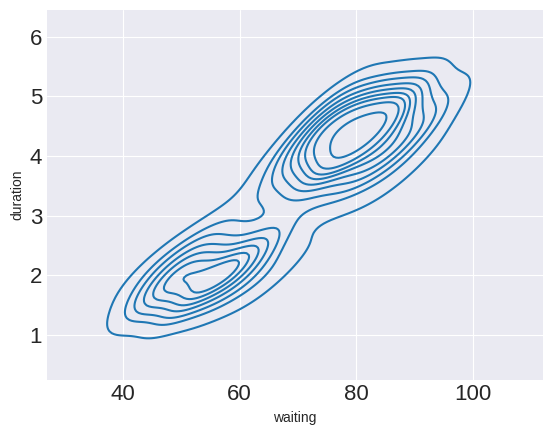

In [129]:
sns.kdeplot(data=geyser, x="waiting", y="duration")

In [137]:
df_1.max().max()

24.6343822479

In [152]:
24.65-2.81

21.84

In [156]:
bins = np.linspace(2.81,24.65, int((24.65-2.81)*100)).round(2)
bins

array([ 2.81,  2.82,  2.83, ..., 24.63, 24.64, 24.65])

In [171]:
for i in df_1.iteritems():
    df_1[f"{i[0]}_1"] = pd.cut(i[1], bins)
    print(df_1.groupby(f"{i[0]}_1").count()[f"{i[0]}"])

15.0_1
(2.81, 2.82]      0
(2.82, 2.83]      0
(2.83, 2.84]      0
(2.84, 2.85]      0
(2.85, 2.86]      0
                 ..
(24.6, 24.61]     0
(24.61, 24.62]    0
(24.62, 24.63]    0
(24.63, 24.64]    1
(24.64, 24.65]    0
Name: 15.0, Length: 2183, dtype: int64
20.0_1
(2.81, 2.82]      0
(2.82, 2.83]      0
(2.83, 2.84]      0
(2.84, 2.85]      0
(2.85, 2.86]      0
                 ..
(24.6, 24.61]     0
(24.61, 24.62]    0
(24.62, 24.63]    0
(24.63, 24.64]    0
(24.64, 24.65]    0
Name: 20.0, Length: 2183, dtype: int64
25.0_1
(2.81, 2.82]      0
(2.82, 2.83]      0
(2.83, 2.84]      0
(2.84, 2.85]      0
(2.85, 2.86]      0
                 ..
(24.6, 24.61]     0
(24.61, 24.62]    0
(24.62, 24.63]    0
(24.63, 24.64]    0
(24.64, 24.65]    0
Name: 25.0, Length: 2183, dtype: int64
30.0_1
(2.81, 2.82]      0
(2.82, 2.83]      0
(2.83, 2.84]      0
(2.84, 2.85]      0
(2.85, 2.86]      0
                 ..
(24.6, 24.61]     0
(24.61, 24.62]    0
(24.62, 24.63]    0
(24.63, 24.64] 

185.0_1
(2.81, 2.82]      0
(2.82, 2.83]      0
(2.83, 2.84]      0
(2.84, 2.85]      0
(2.85, 2.86]      0
                 ..
(24.6, 24.61]     0
(24.61, 24.62]    0
(24.62, 24.63]    0
(24.63, 24.64]    0
(24.64, 24.65]    0
Name: 185.0, Length: 2183, dtype: int64
190.0_1
(2.81, 2.82]      0
(2.82, 2.83]      0
(2.83, 2.84]      0
(2.84, 2.85]      0
(2.85, 2.86]      0
                 ..
(24.6, 24.61]     0
(24.61, 24.62]    0
(24.62, 24.63]    0
(24.63, 24.64]    0
(24.64, 24.65]    0
Name: 190.0, Length: 2183, dtype: int64
195.0_1
(2.81, 2.82]      0
(2.82, 2.83]      0
(2.83, 2.84]      0
(2.84, 2.85]      0
(2.85, 2.86]      0
                 ..
(24.6, 24.61]     0
(24.61, 24.62]    0
(24.62, 24.63]    0
(24.63, 24.64]    0
(24.64, 24.65]    0
Name: 195.0, Length: 2183, dtype: int64
200.0_1
(2.81, 2.82]      0
(2.82, 2.83]      0
(2.83, 2.84]      0
(2.84, 2.85]      0
(2.85, 2.86]      0
                 ..
(24.6, 24.61]     0
(24.61, 24.62]    0
(24.62, 24.63]    0
(24.63, 

360.0_1
(2.81, 2.82]      0
(2.82, 2.83]      0
(2.83, 2.84]      0
(2.84, 2.85]      0
(2.85, 2.86]      0
                 ..
(24.6, 24.61]     0
(24.61, 24.62]    0
(24.62, 24.63]    0
(24.63, 24.64]    0
(24.64, 24.65]    0
Name: 360.0, Length: 2183, dtype: int64
365.0_1
(2.81, 2.82]      0
(2.82, 2.83]      0
(2.83, 2.84]      0
(2.84, 2.85]      0
(2.85, 2.86]      0
                 ..
(24.6, 24.61]     0
(24.61, 24.62]    0
(24.62, 24.63]    0
(24.63, 24.64]    0
(24.64, 24.65]    0
Name: 365.0, Length: 2183, dtype: int64
370.0_1
(2.81, 2.82]      0
(2.82, 2.83]      0
(2.83, 2.84]      0
(2.84, 2.85]      0
(2.85, 2.86]      0
                 ..
(24.6, 24.61]     0
(24.61, 24.62]    0
(24.62, 24.63]    0
(24.63, 24.64]    0
(24.64, 24.65]    0
Name: 370.0, Length: 2183, dtype: int64
375.0_1
(2.81, 2.82]      0
(2.82, 2.83]      0
(2.83, 2.84]      0
(2.84, 2.85]      0
(2.85, 2.86]      0
                 ..
(24.6, 24.61]     0
(24.61, 24.62]    0
(24.62, 24.63]    0
(24.63, 

535.0_1
(2.81, 2.82]      0
(2.82, 2.83]      0
(2.83, 2.84]      0
(2.84, 2.85]      0
(2.85, 2.86]      0
                 ..
(24.6, 24.61]     0
(24.61, 24.62]    0
(24.62, 24.63]    0
(24.63, 24.64]    0
(24.64, 24.65]    0
Name: 535.0, Length: 2183, dtype: int64
540.0_1
(2.81, 2.82]      0
(2.82, 2.83]      0
(2.83, 2.84]      0
(2.84, 2.85]      0
(2.85, 2.86]      0
                 ..
(24.6, 24.61]     0
(24.61, 24.62]    0
(24.62, 24.63]    0
(24.63, 24.64]    0
(24.64, 24.65]    0
Name: 540.0, Length: 2183, dtype: int64
545.0_1
(2.81, 2.82]      0
(2.82, 2.83]      0
(2.83, 2.84]      0
(2.84, 2.85]      0
(2.85, 2.86]      0
                 ..
(24.6, 24.61]     0
(24.61, 24.62]    0
(24.62, 24.63]    0
(24.63, 24.64]    0
(24.64, 24.65]    0
Name: 545.0, Length: 2183, dtype: int64
550.0_1
(2.81, 2.82]      0
(2.82, 2.83]      0
(2.83, 2.84]      0
(2.84, 2.85]      0
(2.85, 2.86]      0
                 ..
(24.6, 24.61]     0
(24.61, 24.62]    0
(24.62, 24.63]    0
(24.63, 

700.0_1
(2.81, 2.82]      0
(2.82, 2.83]      0
(2.83, 2.84]      0
(2.84, 2.85]      0
(2.85, 2.86]      0
                 ..
(24.6, 24.61]     0
(24.61, 24.62]    0
(24.62, 24.63]    0
(24.63, 24.64]    0
(24.64, 24.65]    0
Name: 700.0, Length: 2183, dtype: int64
705.0_1
(2.81, 2.82]      0
(2.82, 2.83]      0
(2.83, 2.84]      0
(2.84, 2.85]      0
(2.85, 2.86]      0
                 ..
(24.6, 24.61]     0
(24.61, 24.62]    0
(24.62, 24.63]    0
(24.63, 24.64]    0
(24.64, 24.65]    0
Name: 705.0, Length: 2183, dtype: int64
710.0_1
(2.81, 2.82]      0
(2.82, 2.83]      0
(2.83, 2.84]      0
(2.84, 2.85]      0
(2.85, 2.86]      0
                 ..
(24.6, 24.61]     0
(24.61, 24.62]    0
(24.62, 24.63]    0
(24.63, 24.64]    0
(24.64, 24.65]    0
Name: 710.0, Length: 2183, dtype: int64
715.0_1
(2.81, 2.82]      0
(2.82, 2.83]      0
(2.83, 2.84]      0
(2.84, 2.85]      0
(2.85, 2.86]      0
                 ..
(24.6, 24.61]     0
(24.61, 24.62]    0
(24.62, 24.63]    0
(24.63, 

865.0_1
(2.81, 2.82]      0
(2.82, 2.83]      0
(2.83, 2.84]      0
(2.84, 2.85]      0
(2.85, 2.86]      0
                 ..
(24.6, 24.61]     0
(24.61, 24.62]    0
(24.62, 24.63]    0
(24.63, 24.64]    0
(24.64, 24.65]    0
Name: 865.0, Length: 2183, dtype: int64
870.0_1
(2.81, 2.82]      0
(2.82, 2.83]      0
(2.83, 2.84]      0
(2.84, 2.85]      0
(2.85, 2.86]      0
                 ..
(24.6, 24.61]     0
(24.61, 24.62]    0
(24.62, 24.63]    0
(24.63, 24.64]    0
(24.64, 24.65]    0
Name: 870.0, Length: 2183, dtype: int64
875.0_1
(2.81, 2.82]      0
(2.82, 2.83]      0
(2.83, 2.84]      0
(2.84, 2.85]      0
(2.85, 2.86]      0
                 ..
(24.6, 24.61]     0
(24.61, 24.62]    0
(24.62, 24.63]    0
(24.63, 24.64]    0
(24.64, 24.65]    0
Name: 875.0, Length: 2183, dtype: int64
880.0_1
(2.81, 2.82]      0
(2.82, 2.83]      0
(2.83, 2.84]      0
(2.84, 2.85]      0
(2.85, 2.86]      0
                 ..
(24.6, 24.61]     0
(24.61, 24.62]    0
(24.62, 24.63]    0
(24.63, 

TypeError: '<' not supported between instances of 'float' and 'pandas._libs.interval.Interval'

In [165]:
df_1

,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0,55.0,60.0,...,935.0_1,940.0_1,945.0_1,950.0_1,955.0_1,960.0_1,965.0_1,970.0_1,975.0_1,980.0_1
182,10.405910,10.388568,10.346299,10.173140,10.018605,9.949411,9.878022,9.786423,9.689561,9.571439,...,"(5.73, 5.74]","(5.71, 5.72]","(5.69, 5.7]","(5.65, 5.66]","(5.62, 5.63]","(5.58, 5.59]","(5.55, 5.56]","(5.51, 5.52]","(5.48, 5.49]","(5.45, 5.46]"
183,8.662434,8.666079,8.666175,8.651962,8.637199,8.619508,8.588789,8.498692,8.422593,8.420044,...,"(5.54, 5.55]","(5.51, 5.52]","(5.49, 5.5]","(5.47, 5.48]","(5.44, 5.45]","(5.42, 5.43]","(5.4, 5.41]","(5.38, 5.39]","(5.36, 5.37]","(5.34, 5.35]"
184,21.361422,21.358507,21.356428,21.359488,21.361910,21.361410,21.309170,21.018839,20.657112,19.765856,...,"(4.46, 4.47]","(4.44, 4.45]","(4.41, 4.42]","(4.39, 4.4]","(4.37, 4.38]","(4.35, 4.36]","(4.33, 4.34]","(4.3, 4.31]","(4.28, 4.29]","(4.26, 4.27]"
185,20.883802,19.969498,19.188072,19.112759,19.003321,18.796558,18.569515,18.269974,17.970945,17.675102,...,"(4.56, 4.57]","(4.54, 4.55]","(4.52, 4.53]","(4.49, 4.5]","(4.46, 4.47]","(4.44, 4.45]","(4.41, 4.42]","(4.38, 4.39]","(4.35, 4.36]","(4.32, 4.33]"
186,19.792868,19.719831,19.602510,19.080366,18.584536,18.251167,17.937361,17.726561,17.534586,17.409611,...,"(4.36, 4.37]","(4.34, 4.35]","(4.31, 4.32]","(4.29, 4.3]","(4.28, 4.29]","(4.26, 4.27]","(4.24, 4.25]","(4.22, 4.23]","(4.2, 4.21]","(4.18, 4.19]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614,13.528889,13.309039,13.283370,13.199798,13.160628,13.092646,13.012565,12.902939,12.815469,12.623040,...,"(5.4, 5.41]","(5.38, 5.39]","(5.37, 5.38]","(5.36, 5.37]","(5.34, 5.35]","(5.3, 5.31]","(5.26, 5.27]","(5.22, 5.23]","(5.2, 5.21]","(5.17, 5.18]"
2645,18.050308,17.894121,17.725538,17.601311,17.540703,17.490482,17.237793,17.050217,16.945787,16.884323,...,"(5.46, 5.47]","(5.43, 5.44]","(5.41, 5.42]","(5.38, 5.39]","(5.36, 5.37]","(5.34, 5.35]","(5.32, 5.33]","(5.28, 5.29]","(5.23, 5.24]","(5.2, 5.21]"
2646,18.174461,18.127340,17.785654,16.073669,15.198271,14.325868,14.126631,13.800106,13.677597,13.528191,...,"(5.08, 5.09]","(5.05, 5.06]","(5.02, 5.03]","(4.99, 5.0]","(4.96, 4.97]","(4.94, 4.95]","(4.89, 4.9]","(4.87, 4.88]","(4.82, 4.83]","(4.79, 4.8]"
2647,17.890545,16.180023,15.680430,15.542944,15.342051,15.204211,14.988433,14.712945,14.320423,13.946916,...,"(6.01, 6.02]","(5.96, 5.97]","(5.93, 5.94]","(5.9, 5.91]","(5.84, 5.85]","(5.84, 5.85]","(5.81, 5.82]","(5.8, 5.81]","(5.77, 5.78]","(5.75, 5.76]"


In [157]:
pd.cut(df_1['15.0'], bins)

182      (10.4, 10.41]
183       (8.66, 8.67]
184     (21.36, 21.37]
185     (20.88, 20.89]
186      (19.79, 19.8]
             ...      
2614    (13.52, 13.53]
2645    (18.05, 18.06]
2646    (18.17, 18.18]
2647     (17.89, 17.9]
2665    (15.74, 15.75]
Name: 15.0, Length: 617, dtype: category
Categories (2183, interval[float64, right]): [(2.81, 2.82] < (2.82, 2.83] < (2.83, 2.84] < (2.84, 2.85] ... (24.61, 24.62] < (24.62, 24.63] < (24.63, 24.64] < (24.64, 24.65]]

In [148]:
df_1.min().min()

2.8395450115200003

In [ ]:
bins = range(0.01,[0, 24., 18, 35, 65, np.inf]
names = ['<2', '2-18', '18-35', '35-65', '65+']

df['AgeRange'] = pd.cut(df['Age'], bins, labels=names)

In [135]:
df_1['15.0']

182     10.405910
183      8.662434
184     21.361422
185     20.883802
186     19.792868
          ...    
2614    13.528889
2645    18.050308
2646    18.174461
2647    17.890545
2665    15.746332
Name: 15.0, Length: 617, dtype: float64

<AxesSubplot:ylabel='Density'>

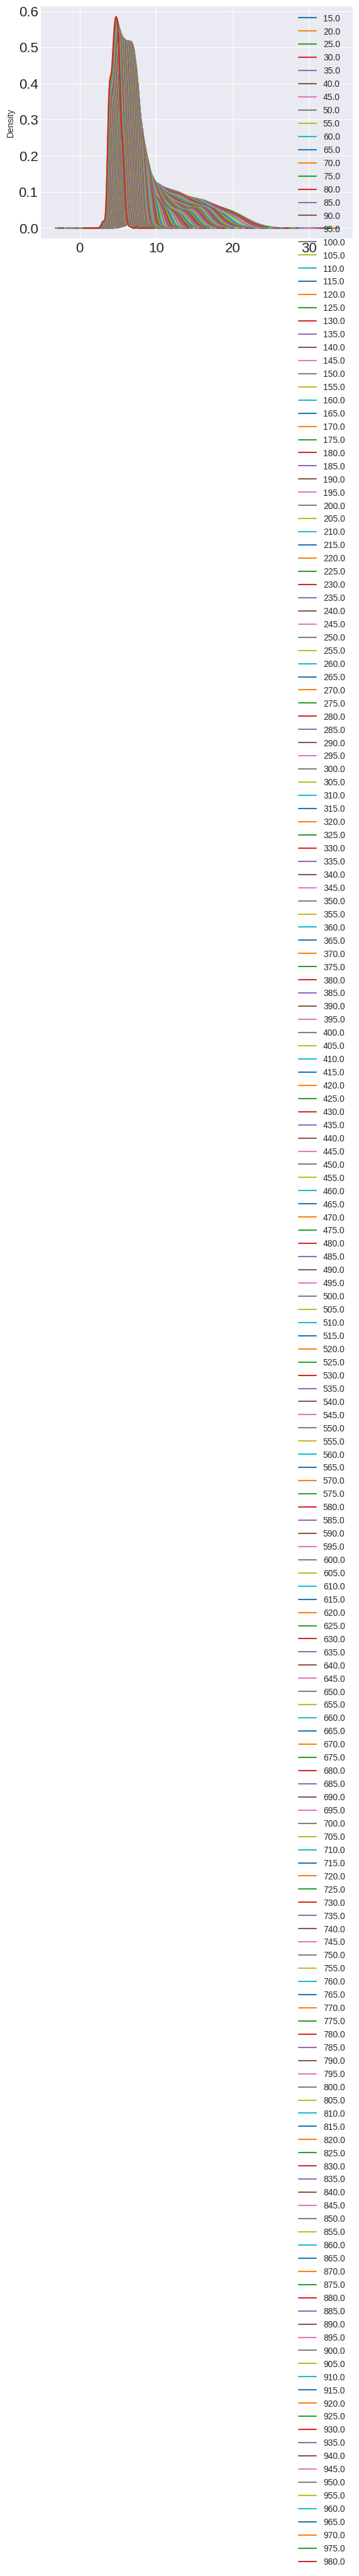

In [126]:
df_1.plot(kind='kde')

In [118]:
from scipy import stats

In [117]:
def plot_kde(x, ax, xlabel, title, color):
    'Creates subplots of kernel density estimations'
    data = shoe_df[x]
    loc = data.mean()
    scale = data.std()
    pdf = stats.norm.pdf(data, loc=loc, scale=scale)
    # Plot pdf as a kde
    ax = sns.kdeplot(x=data, y=pdf, color=color, fill=True, ax=ax)
    # Change face color and grid lines
    ax.set_facecolor('white')
    ax.grid(which='major', linewidth='0.2', color='gray')
    # Set title, x and y labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Probability Density')

<AxesSubplot:ylabel='Density'>

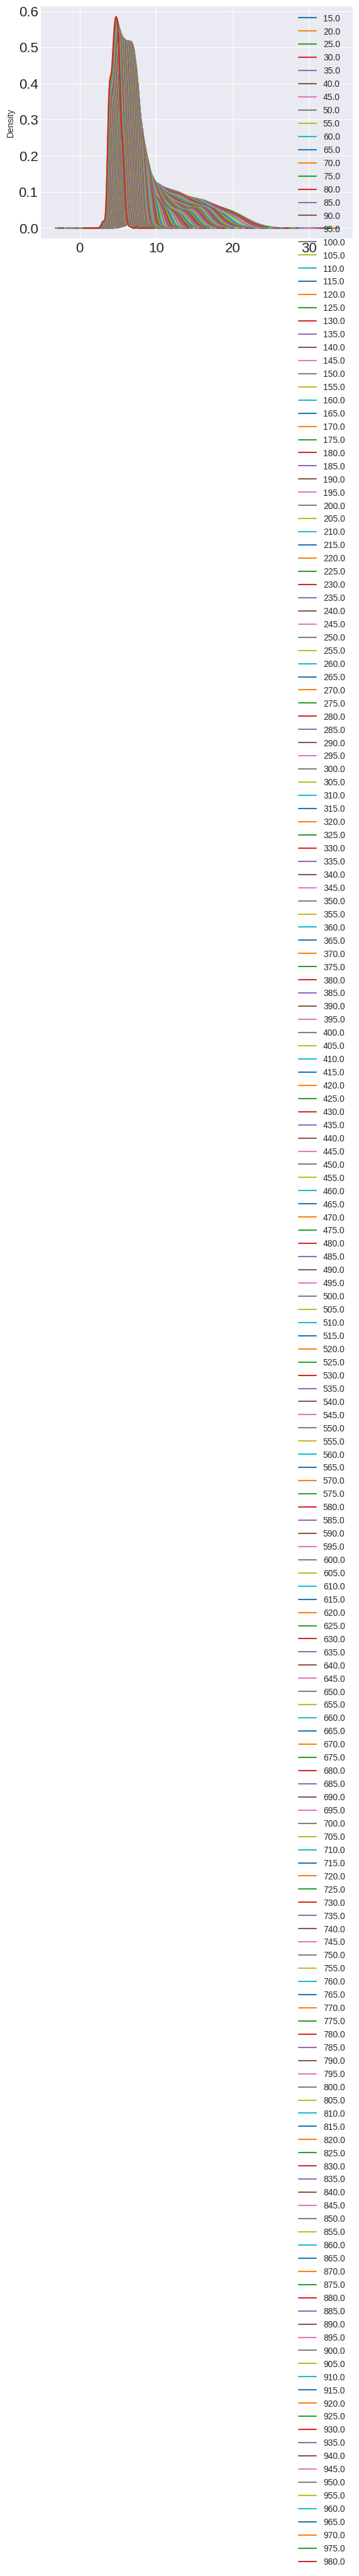

In [124]:
df_1.plot.density()

In [95]:
for i in df_1.iteritems():
    print(i[0])

15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.0
60.0
65.0
70.0
75.0
80.0
85.0
90.0
95.0
100.0
105.0
110.0
115.0
120.0
125.0
130.0
135.0
140.0
145.0
150.0
155.0
160.0
165.0
170.0
175.0
180.0
185.0
190.0
195.0
200.0
205.0
210.0
215.0
220.0
225.0
230.0
235.0
240.0
245.0
250.0
255.0
260.0
265.0
270.0
275.0
280.0
285.0
290.0
295.0
300.0
305.0
310.0
315.0
320.0
325.0
330.0
335.0
340.0
345.0
350.0
355.0
360.0
365.0
370.0
375.0
380.0
385.0
390.0
395.0
400.0
405.0
410.0
415.0
420.0
425.0
430.0
435.0
440.0
445.0
450.0
455.0
460.0
465.0
470.0
475.0
480.0
485.0
490.0
495.0
500.0
505.0
510.0
515.0
520.0
525.0
530.0
535.0
540.0
545.0
550.0
555.0
560.0
565.0
570.0
575.0
580.0
585.0
590.0
595.0
600.0
605.0
610.0
615.0
620.0
625.0
630.0
635.0
640.0
645.0
650.0
655.0
660.0
665.0
670.0
675.0
680.0
685.0
690.0
695.0
700.0
705.0
710.0
715.0
720.0
725.0
730.0
735.0
740.0
745.0
750.0
755.0
760.0
765.0
770.0
775.0
780.0
785.0
790.0
795.0
800.0
805.0
810.0
815.0
820.0
825.0
830.0
835.0
840.0
845.0
850.0
855.0
860

In [88]:
for row in df_1.iteritems():
    

('x', 2        89.600998
4        64.942001
6       109.463997
7       135.981995
21       36.640000
           ...    
2837     90.356142
2839     99.872000
2842    138.729000
2843     82.050000
2844    165.021000
Name: x, Length: 543, dtype: float64)
('y', 2      -56.223000
4      -50.344002
6      -53.396999
7      -56.949001
21     -49.727000
          ...    
2837   -64.524545
2839   -55.721000
2842   -63.489000
2843   -61.522000
2844   -61.051000
Name: y, Length: 543, dtype: float64)
('label', 2       1
4       1
6       1
7       1
21      1
       ..
2837    1
2839    1
2842    1
2843    1
2844    1
Name: label, Length: 543, dtype: int64)
('label_sorted', 2       0
4       0
6       0
7       0
21      0
       ..
2837    0
2839    0
2842    0
2843    0
2844    0
Name: label_sorted, Length: 543, dtype: int64)
('max posterior prob', 2       0.996009
4       0.850861
6       0.997966
7       0.987718
21      0.518286
          ...   
2837    0.999999
2839    0.999965
2842    0.99

In [42]:
(X_proj.std()**2 / ((Xscaled.std()**2).sum())).cumsum()

PC1      181.084007
PC2      190.415788
PC3      192.791161
PC4      193.409375
PC5      193.705946
            ...    
PC190    194.068212
PC191    194.068213
PC192    194.068213
PC193    194.068213
PC194    194.068214
Length: 194, dtype: float64

In [ ]:
W = pca.components_

# Print PCs as COLUMNS
W = pd.DataFrame(W.T,
                 index=wine_features,
                 columns=[f'PC{i}' for i in range(1, 14)])
W
Out[ ]:


In [ ]:
Xpca = pca.transform(Xscaled)

In [12]:
pca = PCA(n_components=6)

# fit PCA model
pca.fit(Xscaled)

# transform input data into PCA representation
Xpca = pca.transform(Xscaled)

array([[ 5.68123674,  5.68384171,  5.60383606, ...,  2.48732376,
         2.48653626,  2.48574901],
       [10.32600021, 10.32600021, 10.32600021, ...,  5.24809599,
         5.20837641,  5.1686573 ],
       [ 2.38345504,  2.38105106,  2.38396597, ...,  1.91830266,
         1.91261363,  1.90692449],
       ...,
       [-0.47515792, -0.50051624, -0.51711047, ...,  1.52292931,
         1.51723385,  1.51090097],
       [-0.20231874, -0.38011235, -0.4662843 , ...,  1.44369078,
         1.43938088,  1.4356935 ],
       [ 2.69401789,  2.69631982,  2.69360018, ...,  1.71192706,
         1.70453584,  1.70299995]])